# LUCAS  (LUng CAncer Simple set)

Data generated artificially by causal Bayesian networks with binary variables

Data was generated with the following porbabilities:

* P(Anxiety=T)=0.64277

* P(Peer Pressure=T)=0.32997

* P(Smoking=T|Peer Pressure=F, Anxiety=F)=0.43118

* P(Smoking=T|Peer Pressure=T, Anxiety=F)=0.74591

* P(Smoking=T|Peer Pressure=F, Anxiety=T)=0.8686

* P(Smoking=T|Peer Pressure=T, Anxiety=T)=0.91576

* P(Yellow Fingers=T|Smoking=F)=0.23119

* P(Yellow Fingers=T|Smoking=T)=0.95372

* P(Genetics=T)=0.15953

* P(Lung cancer=T|Genetics=F, Smoking=F)=0.23146

* P(Lung cancer=T|Genetics=T, Smoking=F)=0.86996

* P(Lung cancer=T|Genetics=F, Smoking=T)=0.83934

* P(Lung cancer=T|Genetics=T, Smoking=T)=0.99351

* P(Attention Disorder=T|Genetics=F)=0.28956

* P(Attention Disorder=T|Genetics=T)=0.68706

* P(Born an Even Day=T)=0.5

* P(Allergy=T)=0.32841

* P(Coughing=T|Allergy=F, Lung cancer=F)=0.1347

* P(Coughing=T|Allergy=T, Lung cancer=F)=0.64592

* P(Coughing=T|Allergy=F, Lung cancer=T)=0.7664

* P(Coughing=T|Allergy=T, Lung cancer=T)=0.99947

* P(Fatigue=T|Lung cancer=F, Coughing=F)=0.35212

* P(Fatigue=T|Lung cancer=T, Coughing=F)=0.56514

* P(Fatigue=T|Lung cancer=F, Coughing=T)=0.80016

* P(Fatigue=T|Lung cancer=T, Coughing=T)=0.89589

* P(Car Accident=T|Attention Disorder=F, Fatigue=F)=0.2274

* P(Car Accident=T|Attention Disorder=T, Fatigue=F)=0.779

* P(Car Accident=T|Attention Disorder=F, Fatigue=T)=0.78861

* P(Car Accident=T|Attention Disorder=T, Fatigue=T)=0.97169

In [84]:
import dowhy
import dowhy.datasets, dowhy.plotter
from dowhy import CausalModel
from dowhy import causal_estimators
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import Image, display

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

### Load the data

In [5]:
df = pd.read_csv('lucas0_train.csv')
df.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1


In [9]:
feature_names = list(df.columns)
feature_names

['Smoking',
 'Yellow_Fingers',
 'Anxiety',
 'Peer_Pressure',
 'Genetics',
 'Attention_Disorder',
 'Born_an_Even_Day',
 'Car_Accident',
 'Fatigue',
 'Allergy',
 'Coughing',
 'Lung_cancer']

## TUTORIAL 2

## STEP 1: Model the problem as a causal graph

### Create Causal Graph

In [61]:
# Get all features names from df
feature_names = list(df.columns)
target_node = 'Lung_cancer'

In [62]:
# Create edges
edges_list = [('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_cancer'), 
                  ('Genetics','Lung_cancer'), ('Genetics','Attention_Disorder'), ('Allergy','Coughing'), 
              ('Lung_cancer','Coughing'),('Lung_cancer','Fatigue'), ('Coughing','Fatigue'),('Fatigue','Car_Accident'), 
              ('Attention_Disorder','Car_Accident')]

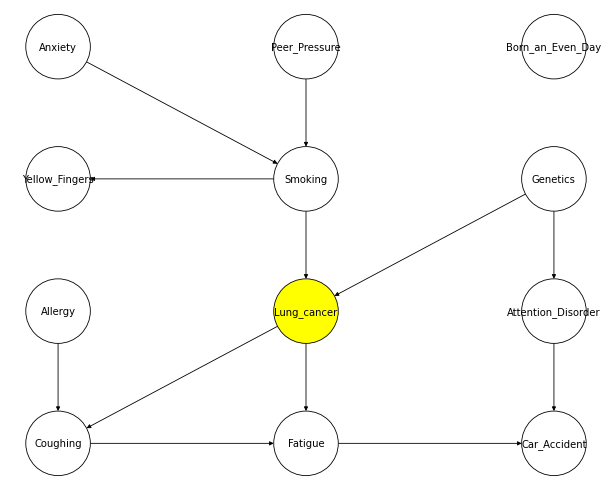

In [63]:
G = nx.DiGraph(directed=True)
G.add_nodes_from(feature_names)
G.add_edges_from(edges_list)

position = {'Anxiety': (-1, 1), 'Peer_Pressure': (0, 1), 'Born_an_Even_Day': (1, 1), 
       'Yellow_Fingers': (-1, 0), 'Smoking': (0, 0),'Genetics': (1, 0), 
       'Allergy': (-1, -1), 'Lung_cancer': (0, -1),'Attention_Disorder': (1, -1),
      'Coughing': (-1, -2), 'Fatigue': (0, -2), 'Car_Accident': (1, -2)}

color_map = ['yellow' if node == target_node else 'w' for node in G]

fig = plt.figure(1, figsize=(10, 8), dpi=60)
nx.draw(G, pos = position, with_labels=True, node_size=6000, node_color=color_map, edgecolors ='black')
nx.write_gml(G, "causal_graph.gml")

In [59]:
print("Current number of nodes in the graph is ", G.number_of_nodes())
print("Current number of edges in the graph is ", G.number_of_edges())

Current number of nodes in the graph is  12
Current number of edges in the graph is  12


In [66]:
# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

In [68]:
print(gml_to_string("causal_graph.gml"))

graph [  directed 1  node [    id 0    label "Smoking"  ]  node [    id 1    label "Yellow_Fingers"  ]  node [    id 2    label "Anxiety"  ]  node [    id 3    label "Peer_Pressure"  ]  node [    id 4    label "Genetics"  ]  node [    id 5    label "Attention_Disorder"  ]  node [    id 6    label "Born_an_Even_Day"  ]  node [    id 7    label "Car_Accident"  ]  node [    id 8    label "Fatigue"  ]  node [    id 9    label "Allergy"  ]  node [    id 10    label "Coughing"  ]  node [    id 11    label "Lung_cancer"  ]  edge [    source 0    target 1  ]  edge [    source 0    target 11  ]  edge [    source 2    target 0  ]  edge [    source 3    target 0  ]  edge [    source 4    target 11  ]  edge [    source 4    target 5  ]  edge [    source 5    target 7  ]  edge [    source 8    target 7  ]  edge [    source 9    target 10  ]  edge [    source 10    target 8  ]  edge [    source 11    target 10  ]  edge [    source 11    target 8  ]]


### Create Model (treatment = Smoking)

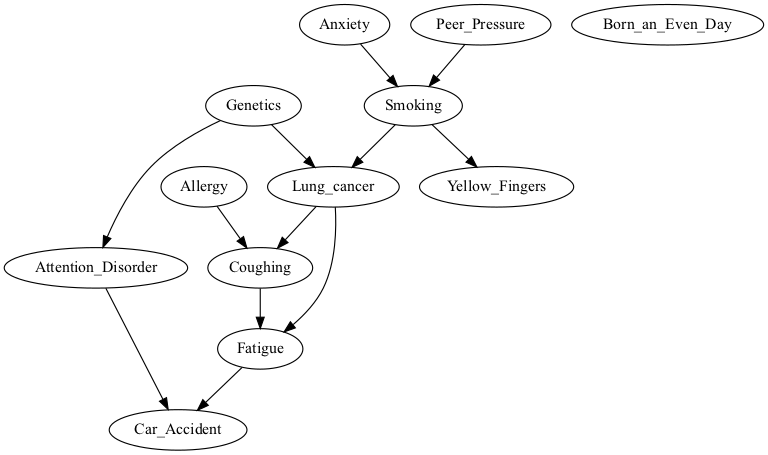

In [73]:
gml_graph = gml_to_string('causal_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Smoking',
        outcome='Lung_cancer',
        graph=gml_graph
        )
model.view_model()

display(Image(filename="causal_model.png", width = 800, height = 2000))

## STEP 2: Identify causal effect using properties of the formal causal graph



In [77]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                               
──────────(Expectation(Lung_cancer))
d[Smoking]                          
Estimand assumption 1, Unconfoundedness: If U→{Smoking} and U→Lung_cancer then P(Lung_cancer|Smoking,,U) = P(Lung_cancer|Smoking,)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Lung_cancer, [Anxiety, Peer_Pressure])*Derivative([Smok
ing], [Anxiety, Peer_Pressure])**(-1))
Estimand assumption 1, As-if-random: If U→→Lung_cancer then ¬(U →→{Anxiety,Peer_Pressure})
Estimand assumption 2, Exclusion: If we remove {Anxiety,Peer_Pressure}→{Smoking}, then ¬({Anxiety,Peer_Pressure}→Lung_cancer)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## STEP 3: Estimate the causal effect

In [79]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

Causal Estimate is 0.5101072997779696


In [81]:
estimate.get_confidence_intervals()

## STEP 4: Refuting the estimate

Replacing treatment with a random (placebo) variable.

In [82]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.5101072997779696
New effect:0.0021658208052519902
p value:0.49



Removing a random subset of the data.

In [83]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:0.5101072997779696
New effect:0.5101835361143444
p value:0.5



## Independence Tests - TO DO

## TUTORIAL 3